In [1]:
from loadFilteredData import *
#loading all data
origImg = loadAllTopicData('original')
gingham = loadAllTopicData('gingham')
clarendon = loadAllTopicData('clarendon')
juno = loadAllTopicData('juno')
lark = loadAllTopicData('lark')
gotham = loadAllTopicData('gotham')
reyes = loadAllTopicData('reyes')

['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphitheater
Loading Topic: amusement_park
Loading Topic: aquarium
Loading Topic: aqueduct
Loading Topic: art_gallery
Loading Topic: assembly_line
Loading Topic: auditorium
(9000, 128, 128, 3)
['abbey', 'airport_terminal', 'amphitheater', 'amusement_park', 'aquarium', 'aqueduct', 'art_gallery', 'assembly_line', 'auditorium']
Loading Topic: abbey
Loading Topic: airport_terminal
Loading Topic: amphithe

In [2]:
def createDataPlaces(images, trainPercentage, validationPercentage):
    categories = len(images)

    imgList = []
    vectors = []

    testImgList = []
    testVectors = []

    valImgList = []
    valVectors = []
    

    #data for original image
    for c in range(categories):
        numImages = images[c].shape[0]
        print(numImages)
        numTrain = int(numImages * trainPercentage)
        numVal = int(numTrain * validationPercentage)
        
        imgList.append(images[c][:numTrain - numVal])
        
        valImgList.append(images[c][numTrain - numVal:numTrain])

        featureVector = np.zeros((numTrain - numVal, categories))
        featureVector[:, c] = 1
        vectors.append(featureVector)
        
        featureVector = np.zeros((numVal, categories))
        featureVector[:, c] = 1
        valVectors.append(featureVector)
    
        #testing data
        testImgList.append(images[c][numTrain:])

        featureVector = np.zeros((numImages - numTrain, categories))
        featureVector[:, c] = 1
        testVectors.append(featureVector)


    X = np.vstack(imgList)
    y = np.vstack(vectors)

    Xtest = np.vstack(testImgList)
    ytest = np.vstack(testVectors)
    
    Xval = np.vstack(valImgList)
    yval = np.vstack(valVectors)

    X, y = shuffle(X, y, random_state=0)
    Xtest, ytest = shuffle(Xtest, ytest, random_state=0)
    Xval, yval = shuffle(Xval, yval, random_state=0)
    
    return X, y, Xtest, ytest, Xval, yval
X, y, Xtest, ytest, xval, yval = createDataPlaces([origImg, clarendon, gingham, juno, lark, gotham, reyes], .9, .005)
# X, y, Xtest, ytest, Xval, yval = createDataPlaces([origImg, clarendon], .9, .005)

9000
9000
9000
9000
9000
9000
9000


KeyboardInterrupt: 

In [4]:
print(Xval.shape)
print(yval.shape)

(80, 128, 128, 3)
(280, 7)


In [6]:
def splitImg(X, y):
    Xsmall = []
    ysmall = []
    for i in range(X.shape[0]):
        l = 0
        for j in range(0, X.shape[1], X.shape[1] // 4):
            for k in range(0, X.shape[1], X.shape[1] // 4):
                block = X[i, j : j + 32, k : k + 32]
                Xsmall.append(block)
                ysmall.append(y[i])
                l += 1
    Xsmall = np.array(Xsmall)
    ysmall = np.array(ysmall)
    return Xsmall, ysmall

In [7]:
Xsmall, ysmall = splitImg(X, y)

In [8]:
Xsmall.shape

(257920, 32, 32, 3)

In [9]:
XvalSmall, yvalSmall = splitImg(Xval, yval)

In [10]:
XvalSmall.shape

(1280, 32, 32, 3)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.5))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.5))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [12]:
model.fit(Xsmall, ysmall, epochs=5, batch_size=128, validation_data=(XvalSmall, yvalSmall))

Train on 257920 samples, validate on 1280 samples
Epoch 1/5
257920/257920 [==============================] - 29s 113us/step - loss: 2.5714 - acc: 0.7365 - val_loss: 0.2310 - val_acc: 0.9133
Epoch 2/5
257920/257920 [==============================] - 26s 101us/step - loss: 0.3389 - acc: 0.8441 - val_loss: 0.1395 - val_acc: 0.9414
Epoch 3/5
257920/257920 [==============================] - 26s 100us/step - loss: 0.2806 - acc: 0.8661 - val_loss: 0.0863 - val_acc: 0.9648
Epoch 4/5
257920/257920 [==============================] - 25s 98us/step - loss: 0.2489 - acc: 0.8781 - val_loss: 0.0651 - val_acc: 0.9672
Epoch 5/5
257920/257920 [==============================] - 25s 98us/step - loss: 0.2373 - acc: 0.8828 - val_loss: 0.0866 - val_acc: 0.9625


In [13]:
XtestSmall, ytestSmall = splitImg(Xtest, ytest)

predict = model.predict(XtestSmall)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytestSmall.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import accuracy_score
print(accuracy_score(ytestSmall.argmax(axis=1), predict.argmax(axis=1)))
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(ytestSmall.argmax(axis=1), predict.argmax(axis=1))

[[14256   144]
 [ 1557 12843]]
0.9409375


(array([0.90153671, 0.98891199]),
 array([0.99    , 0.891875]),
 array([0.94369973, 0.93789024]),
 array([14400, 14400], dtype=int64))

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32, (3, 3), strides = 2))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=3, strides =2))
model.add(Flatten())
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
model.fit(Xsmall, ysmall, epochs=150, batch_size=128, validation_split=0.01)

Train on 256608 samples, validate on 2592 samples
Epoch 1/150
 34304/256608 [===>..........................] - ETA: 30s - loss: 1.3212 - acc: 0.6842

KeyboardInterrupt: 

In [3]:
def createImageData(images, trainPercentage):
    categories = len(images)

    imgList = []
    vectors = []

    testImgList = []
    testVectors = []

    #data for original image
    for c in range(categories):
        numImages = images[c].shape[0]
        print(numImages)
        numTrain = int(numImages * trainPercentage)
        imgList.append(images[c][:numTrain])

        featureVector = np.zeros((numTrain, categories))
        featureVector[:, c] = 1
#         vectors.append(featureVector)
        vectors.append(images[0][:numTrain])
    
        #testing data
        testImgList.append(images[c][numTrain:])

        featureVector = np.zeros((numImages - numTrain, categories))
        featureVector[:, c] = 1
#         testVectors.append(featureVector)
        testVectors.append(images[0][numTrain:])


    X = np.vstack(imgList)
    y = np.vstack(vectors)

    Xtest = np.vstack(testImgList)
    ytest = np.vstack(testVectors)

    X, y = shuffle(X, y, random_state=0)
    Xtest, ytest = shuffle(Xtest, ytest, random_state=0)
    return X, y, Xtest, ytest
X, y, Xtest, ytest = createImageData([origImg, clarendon, gingham, juno, lark, gotham, reyes], .9)
# imX, imy, imXtest, imytest = createImageData([origImg, clarendon], .9)

9000
9000
9000
9000
9000
9000
9000


(56700, 128, 128, 3)

In [ ]:
def divideImages(X, y):
    imXsmall = []
    imysmall = []
    for i in range(X.shape[0]):
        l = 0
        for j in range(0, X.shape[1], X.shape[1] // 4):
            for k in range(0, X.shape[1], X.shape[1] // 4):
                blockX = X[i, j : j + 32, k : k + 32]
                blocky = y[i, j : j + 32, k : k + 32]
                imXsmall.append(blockX)
                imysmall.append(blocky)
                l += 1
    imXsmall = np.array(imXsmall)
    imysmall = np.array(imysmall)
    return imXsmall, imysmall
imXsmall, imysmall = divideImages(X, y)
imXsmall, imysmall = shuffle(imXsmall, imysmall, random_state=0)

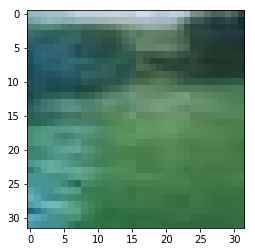

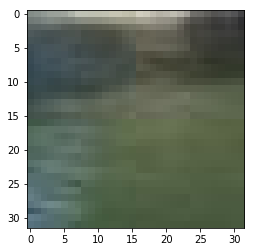

279300
[[243 244 247 ...   6  11  22]
 [249 246 244 ...  21  22  27]
 [ 11  10  10 ...  27  25  24]
 ...
 [ 30  24  18 ...  19  20  19]
 [  5   7  11 ...  21  21  20]
 [ 11  13  16 ...  21  21  20]]


In [107]:
imsmallResidual = imysmall - imXsmall
i = 442
plt.imshow(imXsmall[i])
plt.show()
plt.imshow(imysmall[i])
plt.show()
print(np.sum(np.abs(imXsmall[i] - imysmall[i])))
print(imsmallResidual[i][:,:, 0])

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import LeakyReLU
import numpy as np

model = Sequential()
model.add(Conv2D(6, (3, 3), input_shape=(32, 32, 3), padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(6, (3, 3), padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(3, (3, 3), padding='same'))
# model.add(MaxPooling2D(pool_size=3, strides =2))
# model.add(Flatten())
# model.add(Dense(128))
# model.add(LeakyReLU(alpha=0.3))
# model.add(Dense(256))
# model.add(LeakyReLU(alpha=0.3))
# model.add(Conv2DTranspose(32, (3, 3), strides = 2))
# model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), strides=2))
# model.add(Dropout(0.5))
#model.add(Dense(2, activation='softmax'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [24]:
model.fit(imXsmall, imysmall, epochs=1, batch_size=256, validation_split=0.01)

Train on 898128 samples, validate on 9072 samples
Epoch 1/1
898128/898128 [==============================] - 929s 1ms/step - loss: 417.3434 - mean_absolute_error: 15.8734 - val_loss: 456.5389 - val_mean_absolute_error: 17.5183


In [13]:
np.mean(np.abs(imXsmall - imysmall))

77.29099801558596

In [27]:
imXtestsmall, imytestsmall = divideImages(Xtest, ytest)
#imXtestsmall, imytestsmall = shuffle(imXtestsmall, imytestsmall, random_state=0)

In [25]:
predict = model.predict(imXtestsmall)
np.mean(np.abs(predict - imytestsmall))

14.9010105

In [26]:
from keras.models import load_model
model.save('EndToEndNN1.h5')

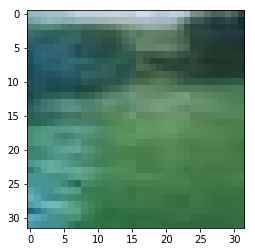

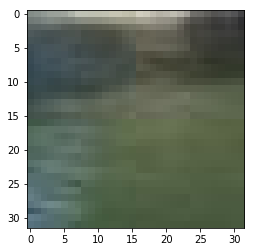

90.91796875


In [16]:
i = 442
plt.imshow(imXsmall[i])
plt.show()
plt.imshow(imysmall[i])
plt.show()
print(np.mean(np.abs(imXsmall[i] - imysmall[i])))

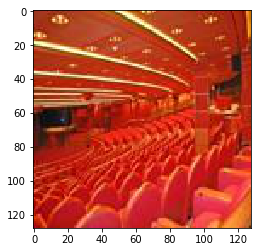

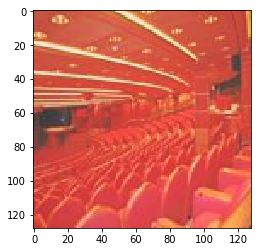

(16, 32, 32, 3)


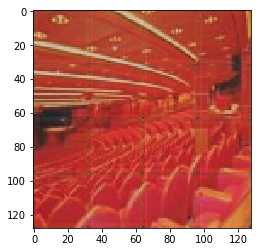

15.515706380208334


In [99]:
k = 5500
im = []
for i in range(k * 4, k * 4 + 4):
    line = np.hstack(imytestsmall[i * 4 : i * 4 + 4])
    im.append(line)
im = np.vstack(im)

plt.imshow(im)
plt.show()

im = []
for i in range(k * 4, k * 4 + 4):
    line = np.hstack(imXtestsmall[i * 4 : i * 4 + 4])
    im.append(line)
im = np.vstack(im)

plt.imshow(im)
plt.show()


imPredSmall = model.predict(imXtestsmall[k * 16 : k * 16 + 16])
imPredSmall = imPredSmall.astype('int')
print(imPredSmall.shape)
im = []
for i in range(4):
    line = np.hstack(imPredSmall[i * 4 : i * 4 + 4])
    im.append(line)
im = np.vstack(im)

plt.imshow(im)
plt.show()

print(np.mean(np.abs(imPredSmall - imytestsmall[k * 16 : k * 16 + 16])))

In [64]:
imXtestsmall[k * 16 : k * 16 + 16]

array([[[[ 10,   5,  12],
         [  0,   3,  15],
         [  0,   6,  17],
         ...,
         [  3,   4,   9],
         [  0,   6,   9],
         [  0,  10,  11]],

        [[ 17,  12,  19],
         [  3,   9,  21],
         [  0,  13,  24],
         ...,
         [  0,   5,   5],
         [  0,   8,   3],
         [  0,  11,   4]],

        [[  0,   0,   7],
         [  0,   4,  16],
         [  4,  26,  39],
         ...,
         [  1,  27,  16],
         [  0,  30,  16],
         [  0,  31,  15]],

        ...,

        [[  0,   4,   5],
         [  7,  25,  27],
         [ 61,  90,  94],
         ...,
         [ 20,  20,  20],
         [  0,   0,   4],
         [  0,   1,   6]],

        [[  0,   3,   4],
         [  7,  25,  27],
         [ 62,  91,  95],
         ...,
         [ 21,  21,  21],
         [  1,   0,   6],
         [  0,   1,   6]],

        [[  0,   3,   4],
         [  7,  25,  27],
         [ 62,  91,  95],
         ...,
         [ 23,  23,  23],
        

In [36]:
im = []
for i in range(4):
    line = np.hstack(imPredSmall[i * 4 : i * 4 + 4])
    im.append(line)
im = np.vstack(im)

plt.imshow(im)

[[ 89  35  11]
 [ 89  35  11]
 [ 89  35  11]
 [ 90  36  12]
 [ 90  36  12]
 [ 90  36  10]
 [ 91  37  11]
 [ 91  37  11]
 [ 91  37   9]
 [ 91  37   9]
 [ 92  38  10]
 [ 93  39  11]
 [ 95  42  11]
 [ 96  43  12]
 [ 97  44  13]
 [ 97  44  13]
 [103  39  12]
 [103  39  12]
 [101  40  12]
 [102  41  13]
 [102  41  13]
 [102  42  14]
 [102  42  14]
 [101  44  15]
 [102  45  16]
 [100  45  15]
 [100  45  15]
 [ 99  46  15]
 [100  47  16]
 [101  48  17]
 [100  49  18]
 [101  50  19]]


In [44]:
print(imPredSmall[0][0])

[[57.897762  25.009315  13.612168 ]
 [66.08729   26.907211   8.88067  ]
 [69.00389   27.758347  11.015296 ]
 [70.15055   28.770735  10.605076 ]
 [70.53425   29.291563  10.464784 ]
 [70.68917   29.456049  10.257028 ]
 [71.94177   30.231426  10.917687 ]
 [72.27056   30.419395  10.4550085]
 [71.51132   29.563093   9.082475 ]
 [72.15798   29.843353   9.025834 ]
 [73.72932   31.031673   9.546621 ]
 [75.428246  32.41693   10.4217205]
 [77.03373   33.8509    11.353556 ]
 [77.970406  34.416065  11.671332 ]
 [79.39225   34.206852  12.282556 ]
 [82.69697   34.62863   12.094486 ]
 [84.53572   33.010067  11.073839 ]
 [84.30469   30.784533  10.619334 ]
 [84.00276   30.791286  10.564947 ]
 [83.7775    30.926058  10.551137 ]
 [84.06975   31.615284  11.109563 ]
 [84.41944   32.60601   11.861271 ]
 [84.59565   33.896187  12.461048 ]
 [84.34593   34.988556  12.496444 ]
 [83.306046  35.170532  11.713701 ]
 [83.86399   36.627613  12.806653 ]
 [82.845314  36.552315  12.533135 ]
 [82.28659   37.129692  12.6

In [45]:
print(imytestsmall[0][0])

[[ 89  35  11]
 [ 89  35  11]
 [ 89  35  11]
 [ 90  36  12]
 [ 90  36  12]
 [ 90  36  10]
 [ 91  37  11]
 [ 91  37  11]
 [ 91  37   9]
 [ 91  37   9]
 [ 92  38  10]
 [ 93  39  11]
 [ 95  42  11]
 [ 96  43  12]
 [ 97  44  13]
 [ 97  44  13]
 [103  39  12]
 [103  39  12]
 [101  40  12]
 [102  41  13]
 [102  41  13]
 [102  42  14]
 [102  42  14]
 [101  44  15]
 [102  45  16]
 [100  45  15]
 [100  45  15]
 [ 99  46  15]
 [100  47  16]
 [101  48  17]
 [100  49  18]
 [101  50  19]]


In [49]:
imPredSmall.astype('int')[1][0] - imytestsmall[1][0]

array([[-33, -14,   6],
       [-22, -12,  -2],
       [-17, -11,   1],
       [-17, -11,  -1],
       [-17, -12,  -1],
       [-17, -13,   1],
       [-16, -12,   1],
       [-15, -12,   1],
       [-16, -14,   0],
       [-17, -13,   0],
       [-16, -13,   0],
       [-15, -12,   0],
       [-16, -13,   1],
       [-15, -12,   1],
       [-14, -11,   2],
       [-17, -13,   0],
       [-14, -13,   0],
       [-14, -13,  -1],
       [-14, -14,  -1],
       [-13, -13,   0],
       [-13, -13,   1],
       [-13, -13,  -1],
       [-12, -13,   1],
       [-12, -13,   1],
       [-12, -13,   2],
       [-13, -13,   2],
       [-13, -12,   1],
       [-13, -12,   3],
       [-13, -12,   2],
       [-13, -12,   3],
       [-25, -14,   3],
       [-39, -14,   6]])

In [52]:
np.mean(np.abs(imPredSmall.astype('int') - imytestsmall[0:16]))

10.778849283854166

In [94]:
imXtestsmall.shape[0] / 16

6300.0

In [104]:
np.mean(np.abs(Xtest- ytest))

81.28673981843171

In [103]:
np.mean(np.abs(Xtest.astype('int32') - ytest.astype('int32')))

18.3308272427352

In [105]:
Xtest.astype('int32') 

array([[[[ 79,  34,  11],
         [ 79,  34,  11],
         [ 79,  34,  11],
         ...,
         [ 31,  22,   7],
         [ 31,  22,   7],
         [ 31,  22,   7]],

        [[ 79,  34,  11],
         [ 79,  34,  11],
         [ 80,  35,  12],
         ...,
         [ 30,  23,   7],
         [ 31,  22,   7],
         [ 31,  22,   7]],

        [[ 80,  35,  12],
         [ 80,  35,  12],
         [ 81,  37,  12],
         ...,
         [ 31,  24,   8],
         [ 30,  23,   7],
         [ 30,  23,   7]],

        ...,

        [[  1,   3,   0],
         [  1,   3,   0],
         [  1,   3,   0],
         ...,
         [  5,   7,   6],
         [  3,   7,   6],
         [  2,   8,   6]],

        [[  1,   3,   0],
         [  1,   3,   0],
         [  1,   3,   0],
         ...,
         [ 11,  13,  12],
         [ 14,  18,  17],
         [ 14,  20,  18]],

        [[  1,   3,   0],
         [  1,   3,   0],
         [  1,   3,   0],
         ...,
         [ 16,  18,  15],
        

In [106]:
Xtest

array([[[[ 79,  34,  11],
         [ 79,  34,  11],
         [ 79,  34,  11],
         ...,
         [ 31,  22,   7],
         [ 31,  22,   7],
         [ 31,  22,   7]],

        [[ 79,  34,  11],
         [ 79,  34,  11],
         [ 80,  35,  12],
         ...,
         [ 30,  23,   7],
         [ 31,  22,   7],
         [ 31,  22,   7]],

        [[ 80,  35,  12],
         [ 80,  35,  12],
         [ 81,  37,  12],
         ...,
         [ 31,  24,   8],
         [ 30,  23,   7],
         [ 30,  23,   7]],

        ...,

        [[  1,   3,   0],
         [  1,   3,   0],
         [  1,   3,   0],
         ...,
         [  5,   7,   6],
         [  3,   7,   6],
         [  2,   8,   6]],

        [[  1,   3,   0],
         [  1,   3,   0],
         [  1,   3,   0],
         ...,
         [ 11,  13,  12],
         [ 14,  18,  17],
         [ 14,  20,  18]],

        [[  1,   3,   0],
         [  1,   3,   0],
         [  1,   3,   0],
         ...,
         [ 16,  18,  15],
        